### 1a Calibrate Heston(1993) Model to Market Data Using Lewis Approach

Model Overview
Heston Model introduces **Stochastic volatility**, where the variance $v_t$ follows a mean-reverting square-root process:
$$
dS_t = rS_tdt+\sqrt{v_t}S_tdW_t^S \\
dv_t = \kappa_v(\theta_v-v_t)dt + \sigma_v\sqrt{v_t}W_t^v \\
dW_t^SdW_t^v=\rho dt
$$

Where:
- $\kappa_v$ : Mean-reversion speed of volatilitty
- $\theta_v$: Long-term volatility level.
- $\sigma_v$: Volatility of volatility
- $\rho$: Correlation between asset returns and volatility
- $v_0$: Initial volatility

---
Characteristic Function of Hestone (1993)
Lewis approach requires the characteristic function of the Heston model:
$$
\varphi^{H93}(u, T) = \exp\left(H_1(u, T) + H_2(u, T) \cdot v_0\right)
$$  
Where:  
- $ H_1(u, T) = r u i T + \frac{c_1}{\sigma_v^2} \left[ (\kappa_v - \rho \sigma_v u i + c_2) T - 2 \ln\left( \frac{1 - c_3 e^{c_2 T}}{1 - c_3} \right) \right] $

- $ H_2(u, T) = \frac{\kappa_v - \rho \sigma_v u i + c_2}{\sigma_v^2} \cdot \left[ \frac{1 - e^{c_2 T}}{1 - c_3 e^{c_2 T}} \right] $  

- $ c_1 = \kappa_v \theta_v $
- $ c_2 = -\sqrt{(\rho \sigma_v u i - \kappa_v)^2 - \sigma_v^2(-u i - u^2)} $  

- $ c_3 = \frac{\kappa_v - \rho \sigma_v u i + c_2}{\kappa_v - \rho \sigma_v u i - c_2} $

---

Pricing via Lewis (2001)
The Lewis (2001) formula for a European call option is:

$$
C_0 = S_0 - \frac{\sqrt{S_0 K} e^{-rT}}{\pi} \int_0^\infty \mathbf{Re}\left[e^{izk} \varphi^{H93}(z - i/2)\right] \frac{dz}{z^2 + 1/4}
$$  
Where:  
- $ k = \ln(S_0 / K) $: Log-moneyness  
- $ \varphi^{H93}(z - i/2) $: Heston characteristic function evaluated at $ u = z - i/2 $  

For put we will use put-call paratity to the value

---
Calibration Process

1. Market Data Preparation
We used 15-day maturity options for SM energy Company
Constants used:
- $S_0$ = 232.90
- $r$ = 0.015
- $T$ = 15/250

2. Error Function (MSE)
- The calibration minimizes the **Mean Squared Error (MSE)** between market and model prices:
$$
MSE = \frac{1}{N} \sum_{n=1}^N \left(C_n^{\text{market}} - C_n^{\text{Heston}}\right)^2
$$

Constraints:
- $ \kappa_v > 0, \theta_v > 0, \sigma_v > 0 $  
- $ \rho \in [-1, 1] $  
- **Feller condition**: $ 2 \kappa_v \theta_v > \sigma_v^2 $ (ensures $ v_t > 0 $)  

3. Optimization (Brute-Force + Local Minimization)
The calibration used a two-step optimization:
    1. Brute-force scan - Coarse grid search fo initial parameter guesses
    2. LOcal optimation - Refine paramerrs using `scipy.optimize.fmin`


---
Calibration Results

1. Calibrated Parameters
After running calibration on 15-day options, Hestom model yielded te following:
- $\kappa_v$ = 2.00004 - Mean-reversion speed
- $\theta_v$ = 0.089892 - Long-term variance
- $\sigma_v$ = 0.111466 Volatility of volatility
- $\rho$ = -0.9 Correlation
- $v_0$ = 0.106175 Initial variance

2. Market vs Model Prices

| Strike | Price | Model |
|---|---|---|
| 227.5 | 10.52 | 10.466581 |
| 230.0 | 10.05 | 9.005143 |
| 232.5 | 7.75 | 7.677493 |
| 235.0 | 6.01 | 6.484287 |
| 237.5 | 4.75 | 5.423759 |
| 227.5 | 4.32 | 4.861924 |
| 230.0 | 5.20 | 5.898236 |
| 232.5 | 6.45 | 7.068337 |
| 235.0 | 7.56 | 8.372882 |
| 237.5 | 8.78 | 9.810105 |

Residuals
- MSE: 0.4664
- RMSE: 0.6829

Also we have graphs showing comparation of the prices both for the call and put options


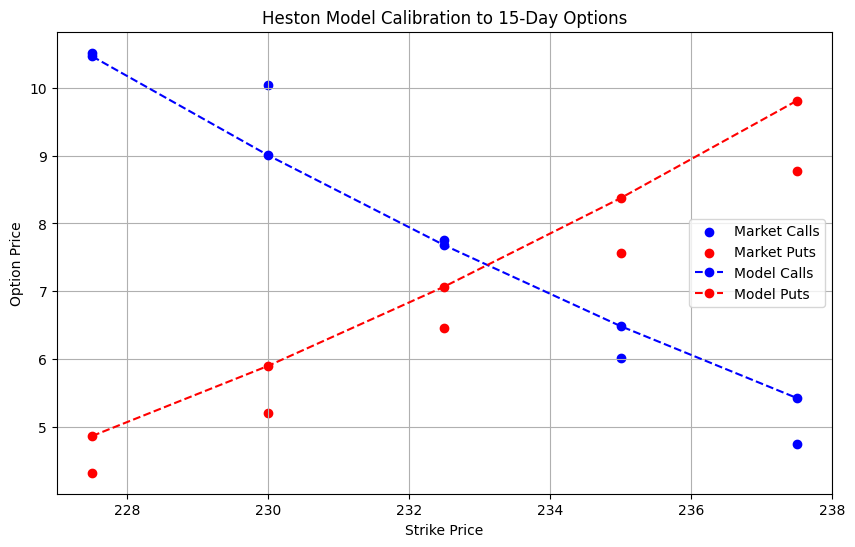

Graph above some plot of both call and put  price for the model  and market price
- For the calls, the model closely matches market prices across all strike which is an indication  our model, Heston,  capture ATM and OTM call dynamics well
- For puts- Our model  overprices deep ITM and slightly underprices OTM puts suggesting the leverage effect was not fully captured

Similar inference could be made from  the residuals

# **STEP2**

## Step 2b Calibrate Bates (1996) Model to 60-Day Options Using Carr-Madan (1999) Approach

#### 1. We will begin by loading the data and also filtereing for 60 days maturiry options

### 2. Define Bates Chacteristic Function for Carr-Madan


It is a combination of two models: Heston and Merton Jump component

### 3. Implementing Carr-Madan Pricing Function under FFT

### 4. Defining the error function for calibration

### 5. Running the Calibration
We will  use differential equation to calibrate the bates model to 60-day options

### 6. Compairing with results from  2a

### 7. Plotting Market vs Model Prices

### 8. Analyzing Residuals

In [ ]:
options_60_copy["Residual"] = options_60_copy['Model'] - options_60_copy['Price']
MSE_60 = np.mean(options_60_copy['Residual'] ** 2)
RMSE_60 = np.sqrt(MSE_60)
print(f"MSE for 60-day options: {MSE_60:.4f}\nRMSE for 60-day options: {RMSE_60:.4f}")


MSE for 60-day options: 1.3860
RMSE for 60-day options: 1.1773


In [ ]:
options_60_copy

,Days to maturity,Strike,Price,Type,T,r,Model,Residual
5,60,227.5,16.78,C,0.24,0.015,17.618659,0.838659
6,60,230.0,17.65,C,0.24,0.015,16.508146,-1.141854
7,60,232.5,16.86,C,0.24,0.015,15.476661,-1.383339
8,60,235.0,16.05,C,0.24,0.015,14.521673,-1.528327
9,60,237.5,15.10,C,0.24,0.015,13.640106,-1.459894
20,60,227.5,11.03,P,0.24,0.015,11.401131,0.371131
21,60,230.0,12.15,P,0.24,0.015,12.781635,0.631635
22,60,232.5,13.37,P,0.24,0.015,14.241166,0.871166
23,60,235.0,14.75,P,0.24,0.015,15.777194,1.027194
24,60,237.5,15.62,P,0.24,0.015,17.386643,1.766643


### 9. How Parameter for Lewis and Carr-Madan Compare ?

# Step 3

### 3a Calibrate a CIR (1985) Model to Euribor Rates and Simulate Future Rates
We will model and simulate future interest rates using Cox-Ingersoll-Ross (CIR) model.

### Model Overview
$$
dr_t = \kappa_r(\theta_r - r_t)dt + \sigma_r\sqrt{r_t}dW_t
$$

where:
- $r_t$ - Short term interest rate at time t
- $\kappa_r$ - Mean-reversion speed
- $\theta_r$ - Long-term mean of interest rates
- $\sigma_r$ - Volatility of interest rates
- $dW_t$ - Brownian motion

### 1. Loading and Interpolating Euribor Term Structure

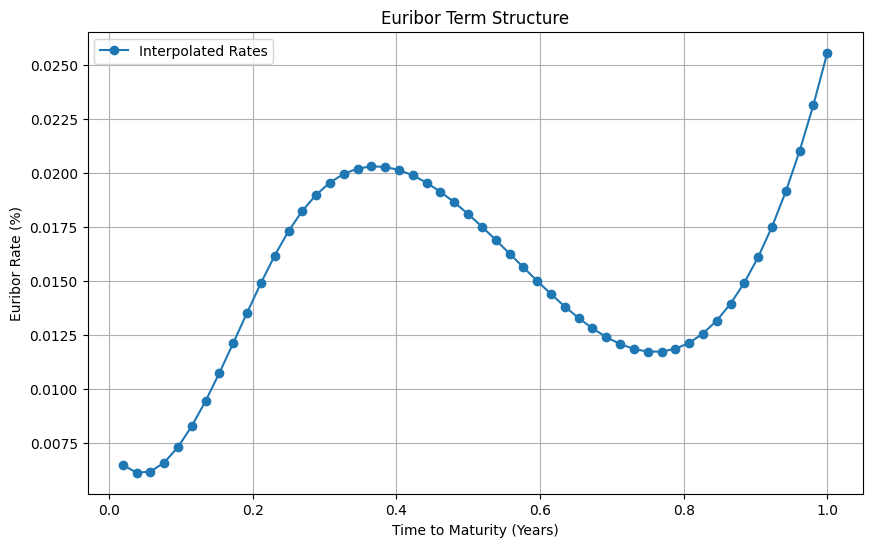

In [ ]:
import numpy as np
import pandas as pd
from scipy.interpolate import CubicSpline
from scipy.optimize import brute, fmin
import matplotlib.pyplot as plt

# Load the data
terms = np.array([1/52, 1/12, 1/4, 1/2, 1])
rates = np.array([0.00648, 0.00679, 0.0173, 0.01809, 0.02556])

# Create a cubic spline interpolation
spline = CubicSpline(terms, rates)

# Generate weekly points for interpolation
weekly_terms = np.arange(1, 53) / 52
weekly_rates = spline(weekly_terms)

# Create a DataFrame for the original rates
bond_rates = pd.DataFrame({
    'Term (Years)': terms,
    'Rate': rates
})

# Create a DataFrame for the interpolated rates
interpolated_rates = pd.DataFrame({
    'Term (Years)': weekly_terms,
    'Interpolated Rate': weekly_rates
})

# Plotting the interpolated rates
plt.figure(figsize=(10, 6))
plt.plot(interpolated_rates['Term (Years)'], interpolated_rates['Interpolated Rate'], marker='o', label='Interpolated Rates')
plt.xlabel('Time to Maturity (Years)')
plt.ylabel('Euribor Rate (%)')
plt.title('Euribor Term Structure')
plt.grid(True)
plt.legend()
plt.show()


### Step 2 Calibrating the CIR Model for the Term Structure

For this we will use CIR model  which  implies a bond price formula:
$$
P(t, T) = A(t, T)e^{-B(t, T)r_t}
$$
- First we will define an error function that compares market bond prices and CIR model bond prices then use `scipy.optimize ` to minimize the RMSE between market and model prices

In [ ]:
def CIR_bond_price(r0, T, kappa_r, theta_r, sigma_r):
    """
    CIR bond price formula
    """
    h = np.sqrt(kappa_r**2 + 2 * sigma_r**2)
    B = 2 * (np.exp(h * T) - 1) / (2 * h + (h + kappa_r) * (np.exp(h * T) - 1))
    A = (2 * h * np.exp((h + kappa_r) * T / 2) / (2 * h + (h + kappa_r) * (np.exp(h * T) - 1))) ** (2 * kappa_r * theta_r / sigma_r**2)
    A = np.exp((kappa_r * theta_r - 0.5 * sigma_r**2) * T)
    return A * np.exp(-B * r0)

def CIR_error_function(p0, bond_data, r0):
    """
    Error function for CIR model calibration
    """
    kappa_r, theta_r, sigma_r = p0

    # Parameter constraints
    if kappa_r < 0.0 or theta_r < 0.0 or sigma_r < 0.0:
        return 5000.0

    # Compute MSE
    se = []
    for _, bond in bond_data.iterrows():
        T = bond["Term (Years)"]
        market_price = bond["Bond Price"]
        model_price = CIR_bond_price(r0, T, kappa_r, theta_r, sigma_r)
        se.append((model_price - market_price)**2)

    MSE = sum(se) / len(se)
    return MSE

def CIR_calibration(bond_data, r0):
    """
    Calibrate CIR model to bond data
    """
    # Brute-force scan for initial guesses
    p0 = brute(
        lambda p: CIR_error_function(p, bond_data, r0),
        (
            (0.1, 5.0, 0.5),  # kappa_r
            (0.01, 0.1, 0.01),  # theta_r
            (0.01, 0.5, 0.05)   # sigma_r
        ),
        finish=None
    )

    # Refining with fmin
    opt = fmin(lambda p: CIR_error_function(p, bond_data, r0),
               p0,
               xtol=0.0001,
               ftol=0.0001,
               maxiter=500,
               maxfun=1000)
    return opt

# Running the calibration
# adding bond price
bond_prices = CIR_bond_price(0.00648, bond_rates['Term (Years)'], 0.1, 0.01, 0.05)
bond_rates['Bond Price'] = bond_prices
calibrated_params_cir = CIR_calibration(bond_rates, r0=0.00648)

Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 20
         Function evaluations: 41


### Step 3: Simulating Future 12 month Euribor Rates

We will use the calibrated CIR parameter from  above step  to  simulate future rates

In [ ]:
def simulate_CIR(r0, T, N, kappa_r, theta_r, sigma_r, paths=100000):
    """
    Simulate future interest rates using the CIR model
    """
    dt = T / N
    rates = np.zeros((paths, N + 1))
    rates[:, 0] = r0

    for i in range(1, N + 1):
        # Ensure rates do not become negative before taking the square root
        rates[:, i-1] = np.maximum(rates[:, i-1], 0)
        dr = kappa_r * (theta_r - rates[:, i - 1]) * dt + sigma_r * np.sqrt(rates[:, i - 1]) * np.random.normal(size=paths) * np.sqrt(dt)
        rates[:, i] = rates[:, i - 1] + dr
        # Ensure rates do not become negative after adding the increment
        rates[:, i] = np.maximum(rates[:, i], 0)

    return rates

# Simulating 12 months of interest rates
r0 = interpolated_rates[interpolated_rates['Term (Years)'] == 1.0]['Interpolated Rate'].values[0]
T = 1 # 1 year
N = 250 # Daily steps
paths = 100000 # Number of paths
kappa_r, theta_r, sigma_r = calibrated_params_cir

future_rates = simulate_CIR(r0, T, N, kappa_r, theta_r, sigma_r, paths)

# Computing Confidence Intervals
confidence_intervals = np.percentile(future_rates, [2.5, 97.5], axis=0)
excepted_rate = np.mean(future_rates, axis=0)


print(f"95% confidence intervals for 12 months of interest rates in 1 year: [{confidence_intervals[0][-1]: .4f}, {confidence_intervals[1][-1]: .4f}]")
print(f"Expected interest rate in 1 year: {excepted_rate[-1]: .4f}")

95% confidence intervals for 12 months of interest rates in 1 year: [ 0.0036,  0.0706]
Expected interest rate in 1 year:  0.0289
